In [1]:
# importamos paquetes necesarios
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Taller 4
Por: Paola Andrea Fernández 

Realice un modelo con dummies estacionales y un SARIMA que tenga en cuenta posibles efectos día de la semana, y compare los resultados con los modelos estimados para el taller 3.

<AxesSubplot:title={'center':'Apple Inc'}, xlabel='Date'>

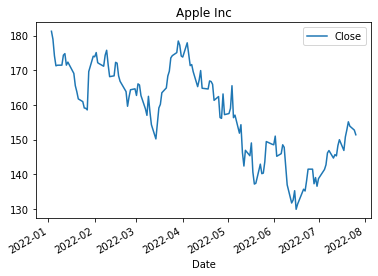

In [2]:
stock = yf.Ticker("AAPL")
prices = stock.history(start="2022-01-01",  end="2022-07-27")[['Close']]
prices.plot(title = 'Apple Inc')

### Modelo con dummies estacionales

Realizamos un modelo arima con dummies estacionales

In [3]:
# creamos las dummies con los dias de la semana
prices['Day Name'] = [date.day_name() for date in prices.index]
prices['IsMonday'] = (prices['Day Name'] == 'Monday')*1
prices['IsTuesday'] = (prices['Day Name'] == 'Tuesday')*1
prices['IsWednesday'] = (prices['Day Name'] == 'Wednesday')*1
prices['IsThursday'] = (prices['Day Name'] == 'Thursday')*1
prices['IsFriday'] = (prices['Day Name'] == 'Friday')*1
prices

,Close,Day Name,IsMonday,IsTuesday,IsWednesday,IsThursday,IsFriday
Date,,,,,,,
2022-01-03,181.259933,Monday,1,0,0,0,0
2022-01-04,178.959442,Tuesday,0,1,0,0,0
2022-01-05,174.199158,Wednesday,0,0,1,0,0
2022-01-06,171.291183,Thursday,0,0,0,1,0
2022-01-07,171.460495,Friday,0,0,0,0,1
...,...,...,...,...,...,...,...
2022-07-20,152.827713,Wednesday,0,0,1,0,0
2022-07-21,155.134521,Thursday,0,0,0,1,0
2022-07-22,153.876251,Friday,0,0,0,0,1


In [4]:
model_w_dummies = ARIMA(endog = prices['Close'], exog= prices.iloc[:,-4:], order=(1,1,1)).fit(disp=0)
print(model_w_dummies.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  140
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -365.488
Method:                       css-mle   S.D. of innovations              3.271
Date:                Wed, 10 Aug 2022   AIC                            746.976
Time:                        13:42:04   BIC                            770.509
Sample:                             1   HQIC                           756.540
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5931      0.628     -0.944      0.345      -1.825       0.638
IsTuesday         1.0950      0.926      1.183      0.237      -0.719       2.909
IsWednesday       0.5378      0.933     

Observamos que los coeficientes de las variables dummy no son significativas, esto prodría indicar la ausencia de efectos estacionales.

### Modelo SARIMA

In [23]:
model_sarima = sm.tsa.statespace.SARIMAX(endog=prices['Close'],order = (1,1,1),seasonal_order=(0,1,1,5)).fit(disp= 0)
print(model_sarima.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                  141
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 5)   Log Likelihood                -364.385
Date:                           Wed, 10 Aug 2022   AIC                            736.769
Time:                                   13:47:08   BIC                            748.390
Sample:                                        0   HQIC                           741.492
                                           - 141                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8865      0.080    -11.089      0.000      -1.043      -0.730
ma.L1          0.9670      0.054     17.944

### Modelo ARIMA

In [13]:
model_1 = ARIMA(prices['Close'], order=(1,1,1)).fit(disp=0)
print(model_1.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  140
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -367.292
Method:                       css-mle   S.D. of innovations              3.314
Date:                Wed, 10 Aug 2022   AIC                            742.584
Time:                        13:43:05   BIC                            754.350
Sample:                             1   HQIC                           747.365
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2363      0.074     -3.184      0.001      -0.382      -0.091
ar.L1.D.Close     0.9278      0.036     25.653      0.000       0.857       0.999
ma.L1.D.Close    -1.0000      0.019    -

### Comparación de modelos
Se calculan diferentes criterios para bondad de ajuste del modelo. Usaremos los siguientes criterios basados en ajuste muestrales:
- AIC (Akaike information criterion)
- BIC (Bayesian information criterion)
- HIQC (Hannan-Quinn information criterion)

In [24]:
pd.DataFrame({
    'Model' : ['ARIMA', 'ARIMA w/ seasonal dummies', 'SARIMA'],
    'AIC': [model_1.aic, model_w_dummies.aic, model_sarima.aic],
    'BIC': [model_1.bic, model_w_dummies.bic, model_sarima.bic],
    'HIQC': [model_1.hqic,model_w_dummies.hqic, model_sarima.hqic ]
    }).set_index('Model')

,AIC,BIC,HIQC
Model,,,
ARIMA,742.583609,754.350178,747.365191
ARIMA w/ seasonal dummies,746.976352,770.509491,756.539516
SARIMA,736.769167,748.390266,741.491655


El mejor modelo es el SARIMA(1, 1, 1)x(0, 1, 1, 5)